## 1 Load libs / Load turkish-se-SP500vsMSCI.csv  / Load mtcarsdata-4features.csv.csv dataset

In [27]:
#!/usr/bin/env python
import pandas as pd
import numpy as np
# import traceback
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px
sns.set_palette("tab10")

In [28]:
# Linear regression model without intercept is regression model just with a starting point at (0,,0)
turkishStock = pd.read_csv("../src/turkish-se-SP500vsMSCI.csv", sep=',', names=['x1', 'x2'])
print("THIS IS THE TURKISH STOCK EXCHANGE")
turkishStock[:5]

THIS IS THE TURKISH STOCK EXCHANGE


,x1,x2
0,-0.004679,0.012698
1,0.007787,0.011341
2,-0.030469,-0.017073
3,0.003391,-0.005561
4,-0.021533,-0.010989


In [29]:
# lubu dubu
# mtCarsData = pd.read_csv("../src/mtcarsdata-4features.csv", sep=',', names=['x1', 'x2'])
mtCarsData = pd.read_csv("../src/mtcarsdata-4features.csv",engine= "python", sep=' ,')
mtCarsData = pd.read_csv("../src/mtcarsdata-4features.csv", )
print("THIS IS THE MTCarsData")
mtCarsData[:5]

THIS IS THE MTCarsData


,Model,mpg,disp,hp,weight
0,Mazda_RX4,21.0,160.0,110,2.620
1,Mazda_RX4Wag,21.0,160.0,110,2.875
2,Datsun_710,22.8,108.0,93,2.320
3,Hornet_4_Drive,21.4,258.0,110,3.215
4,Hornet_Sportabout,18.7,360.0,175,3.440


## 2.1 One-dimensional problem without intercept on the Turkish stock exchange data
### Using least squares solution to linear regression problem
$w = \frac {\sum \limits _{l=1} ^{N} x_{l} t_{l}} {\sum \limits _{l=1} ^{N} x^2_{l}}   $

--- w equals =  0.6339446342595815  ---


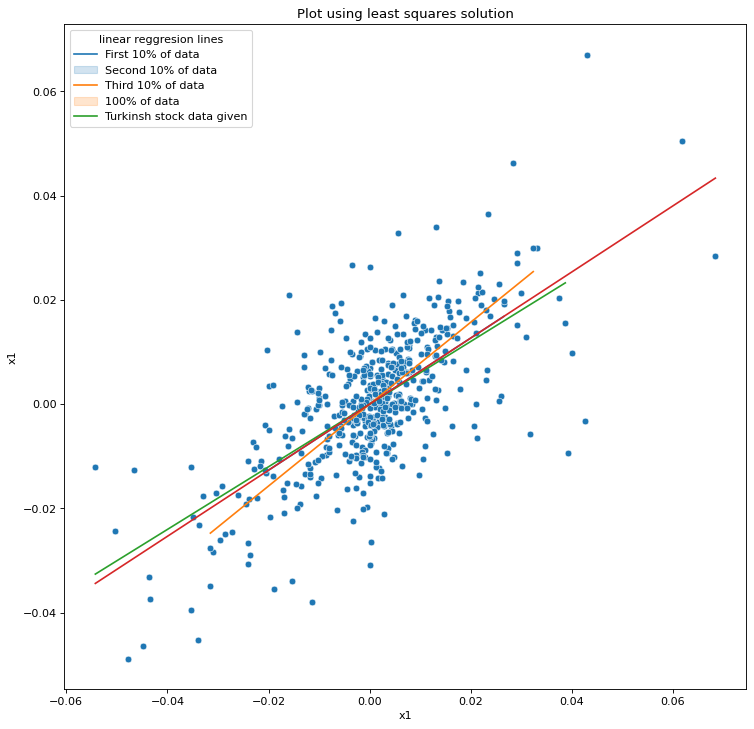

In [30]:
plt.figure(figsize= (11,11), dpi=80)
turkishStock_LinearOne = turkishStock
w = (turkishStock_LinearOne["x1"]*turkishStock_LinearOne["x2"])
w = w.sum() / (turkishStock_LinearOne["x1"]*turkishStock_LinearOne["x1"]).sum()
print("--- w equals = ", w, " ---")

for i in range(3):
    randomSubset1 = turkishStock_LinearOne.sample(frac=0.1)
    wSubset = (randomSubset1["x1"]*randomSubset1["x2"])
    wSubset = wSubset.sum()/(randomSubset1["x1"]**2).sum()
    sns.lineplot(
        y = randomSubset1["x1"]*wSubset,
        x = randomSubset1["x1"]
        )
# Plot with w calculated from 100% of data
sns.lineplot(
    y = turkishStock_LinearOne["x1"]*w,
    x = turkishStock_LinearOne["x1"]
    )
# Scatter plot with points with 100% of data
sns.scatterplot(
    data = turkishStock_LinearOne, x = "x1",
    y = "x2").set_title("Plot using least squares solution"
    )
plt.legend(title='linear reggresion lines', loc='upper left', labels=['First 10% of data', 'Second 10% of data', 'Third 10% of data', '100% of data', 'Turkinsh stock data given'])
plt.show()
# print(np.random.permutation(11)[:10])

# Bonus 1
## Linear Regression without intercept (probabably)- standarized data
#### Using standarizastion for negleting big changes in data

In [31]:
turkishStock_standarized = (turkishStock-turkishStock.mean())/turkishStock.std()
turkishStock_standarized[:5]

,x1,x2
0,-0.377679,0.941296
1,0.506880,0.836802
2,-2.207658,-1.350527
3,0.194996,-0.464321
4,-1.573588,-0.882155


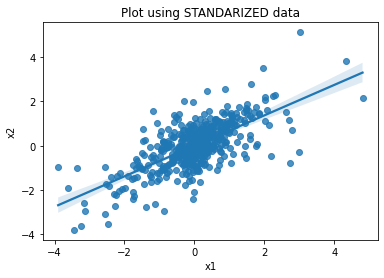

In [32]:
sns.regplot(data=turkishStock_standarized, x='x1', y='x2').set_title("Plot using STANDARIZED data")
plt.show()

turkishStock_standarized 1072
dataSampleTurkish 108


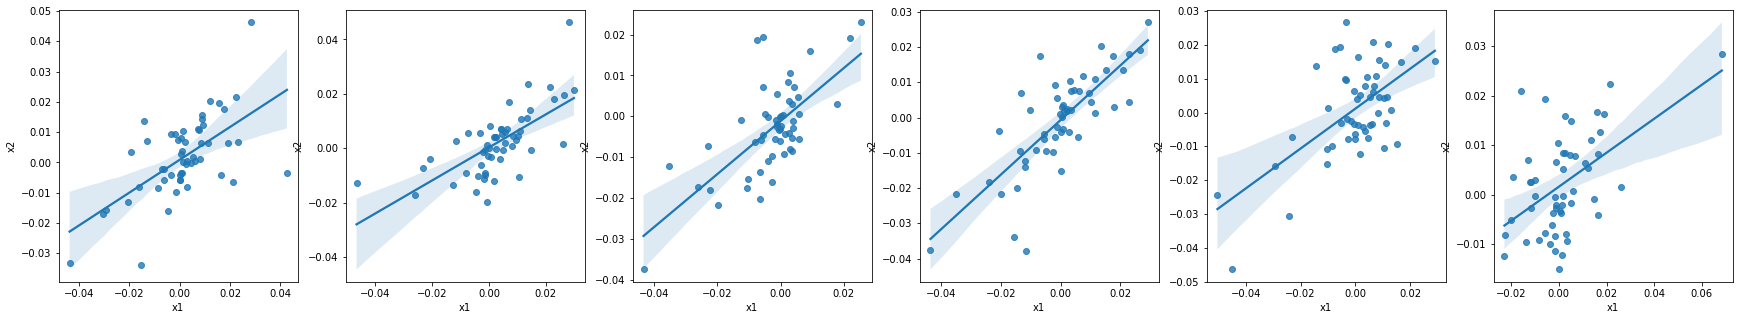

In [33]:
dataSampleTurkish = turkishStock_standarized.sample(frac=0.1)
print("turkishStock_standarized",turkishStock_standarized.size)
print("dataSampleTurkish",dataSampleTurkish.size)


# plt.show()
fig, axes = plt.subplots(1, 6, figsize=(30, 5))
# fig, axes = plt.subplots(1, 5, figsize=(15, 15), sharey=True)


for i in range (6):
    dataSampleTurkish = turkishStock.sample(frac=0.1)
    sns.regplot(ax= axes[i], data=dataSampleTurkish, x='x1', y='x2').set_label("Plots with random 10'%' data mean and 95'%' confidence interval")
# sns.regplot(ax= axes[6], data=turkishStock, x='x1', y='x2')
plt.show()
# https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8

# 2.3 One-dimensional problem with intercept on the Motor Trends car data, using columns mpg and weight 

$w = \frac {\sum \limits _{l=1} ^{N} (x_{l} - \hat{x_{l}}) (t_{l} - \hat{x_{t}})} {\sum \limits _{l=1} ^{N} (x_{l} - \hat{x_{l}})^2}   $

In [36]:
plt.figure(figsize= (11,11), dpi=80)

xEquation = mtCarsData[" weight"]
tEquation = mtCarsData[" mpg"]

tEquation = tEquation.to_frame()
xEquation = xEquation.to_frame()

xMean = xEquation.mean().to_numpy()
tMean = tEquation.mean().to_numpy()


tEquation.set_axis(["Mpg"], axis=1)
xEquation.set_axis(["Weight"], axis=1)

print(xEquation[:3])
# print(tEquation[:3])
print(xEquation.loc[3], "<_THIS IS IT")

# print(tEquation.iloc[1])
# print(xEquation.Name)




wSolutionTop = 0
wSolutionBot = 0


for index, _ in xEquation.iterrows():
    # print(index, "<_ this is an index")
    wSolutionTop += ((xEquation.loc[index]).subtract(xMean)).to_numpy()
    wSolutionTop *= ((tEquation.loc[index]).subtract(tMean)).to_numpy()
    
    # wSolutionTop += ((xEquation.loc[index]).subtract((xMean)))
    
    # wSolutionTop = wSolutionTop.multiply(tEquation.loc[index])
#   

    # wSolutionTop += ((xEquation.iloc[index] - xEquation.mean())*(tEquation.iloc[index] - tEquation.mean()))
    wSolutionBot += xEquation.loc[index].subtract(xMean).to_numpy()


w1 = wSolutionTop / wSolutionBot
w0 = tEquation.mean() - w1 * xEquation.mean()
wSolution = (xEquation.subtract(xMean))
wSolution = wSolution.multiply(tEquation.subtract(tMean), fill_value=0)

print("wSolutionTop _>",wSolutionTop)
print("wSolutionBot _>", wSolutionBot)
print("wSolution _>", wSolution)

# print(f"Solution w1 to the one dimensional problem with intercept equals _> {w1}")
# print(f"Solution w0 to the one dimensional problem with intercept equals _> {w0}")

# # plotLinear = sns.lineplot(x = xEquation, y = (w1*xEquation + w0))
# plotLinear.set(xlabel='weight', ylabel='mpg')
# plotPoints = sns.scatterplot(x = xEquation, y = tEquation)

    weight
0    2.620
1    2.875
2    2.320
 weight    3.215
Name: 3, dtype: float64 <_THIS IS IT
wSolutionTop _> [-9.39700685e+16]
wSolutionBot _> [-1.33226763e-14]
wSolution _>      mpg   weight
0    0.0     -0.0
1    0.0     -0.0
2    0.0     -0.0
3    0.0     -0.0
4   -0.0      0.0
5   -0.0      0.0
6   -0.0      0.0
7    0.0     -0.0
8    0.0     -0.0
9   -0.0      0.0
10  -0.0      0.0
11  -0.0      0.0
12  -0.0      0.0
13  -0.0      0.0
14  -0.0      0.0
15  -0.0      0.0
16  -0.0      0.0
17   0.0     -0.0
18   0.0     -0.0
19   0.0     -0.0
20   0.0     -0.0
21  -0.0      0.0
22  -0.0      0.0
23  -0.0      0.0
24  -0.0      0.0
25   0.0     -0.0
26   0.0     -0.0
27   0.0     -0.0
28  -0.0     -0.0
29  -0.0     -0.0
30  -0.0      0.0
31   0.0     -0.0


<Figure size 880x880 with 0 Axes>

## Bonus 2
### Using numpy auto linalg.lstsq (least squares method)

In [35]:

np.append(x, [0])


print(x[:5])
print("mtCarsData[' hp']",x.size)
print("mtCarsData[' weight']",y.size)

x = x[:,np.newaxis]
a, _, _, _ = np.linalg.lstsq(x, y, rcond=None)
plt.plot(x, y, 'bo')
plt.plot(x, a*x, 'r-')

plt.show()
print(f"y = {a} x + 0")

NameError: name 'x' is not defined